## BIke Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



In [1]:
# Steps of analysis:
# 1. Reading and Understanding the Data
# 2. Performing EDA and few visualizations
# 3. Data Preparation
# 4. Data building (test,train)
# 5. Building the model
# 6. Making predictions with the final model
# 7. Model Evaluation

## Step 1: Reading and Understanding the Data

I will first import NumPy and Pandas and read the housing dataset

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split

In [4]:
#Loading the data
bike = pd.read_csv('day.csv')

In [5]:
# Printing the data(first 5 rows)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Get the Basic information about the data
## Number of rows and columns
#checking whether there are any missing values
print('Number of Columns:',bike.shape[1])
print('Number of Rows:',bike.shape[0])
## Number of missing values
print('Number of missing values:',bike.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',bike.nunique().sum())
## Number of duplicates
print('Number of duplicates:',bike.duplicated().sum())

Number of Columns: 16
Number of Rows: 730
Number of missing values: 0
Number of unique values: 5900
Number of duplicates: 0


In [7]:
bike.shape

(730, 16)

In [8]:
#Replacing the names with clear names and changing the data into more convient way.
bike.rename(columns={'yr': 'year'}, inplace=True)
bike.rename(columns={'weathersit  ': 'whether'}, inplace=True)
bike['year'] = bike['year'].replace({0: 2018, 1: 2019})

#I am changing the season numerics into strings same for whether for better understanding.
bike['season'] = bike['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit'] = bike['weathersit'].replace({1:'clear', 2:'mist', 3:'light-snow', 4:'heavy-rain'})

#Renaming the whether column
bike.rename(columns={'weathersit': 'weather'}, inplace=True)

In [9]:
#Renaming coulmns for better READABILITY
bike.rename(columns={'hum': 'humidity'}, inplace=True)
bike.rename(columns={'mnth': 'month'}, inplace=True)

In [10]:
#Dropping the temp column since we have the atemp column which gives us the data
bike.drop(columns=['temp'], inplace=True)
bike.drop(columns=['instant'], inplace=True)

In [11]:
#CHecking the information on how the data is and the datatyoes.
bike.head()

,dteday,season,year,month,holiday,weekday,workingday,weather,atemp,humidity,windspeed,casual,registered,cnt
0,01-01-2018,spring,2018,1,0,6,0,mist,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,2018,1,0,0,0,mist,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,2018,1,0,1,1,clear,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,2018,1,0,2,1,clear,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,2018,1,0,3,1,clear,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Performing EDA 
#### Not Mandatory just for a better understading of the variences between the varaiables.

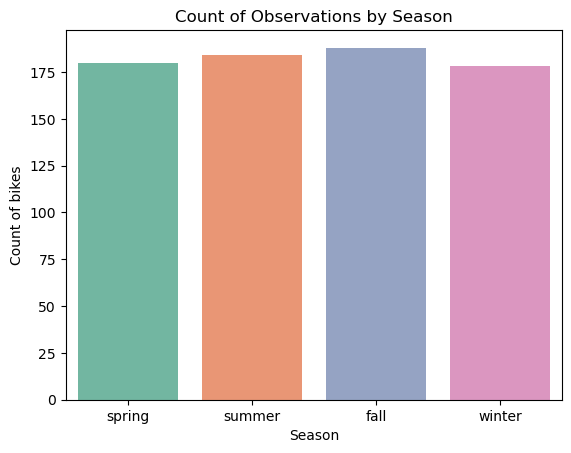

In [12]:
#Univariate analysis
#First we will plot a bar plot for the temperatrue and the count variable
sns.countplot(x='season', data=bike, palette='Set2')
# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Count of bikes')
plt.title('Count of Observations by Season')


# Showing the plot
plt.show()

Text(0.5, 1.0, 'count of bikes by whether')

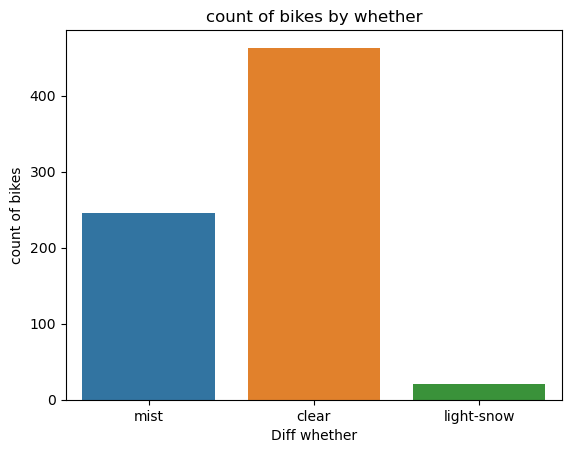

In [13]:
#plotting the count plot for different whethers
sns.countplot(x='weather', data=bike)
#Adding labels and title
plt.xlabel('Diff whether')
plt.ylabel('count of bikes')
plt.title('count of bikes by whether')

Here we can see that in clear whether more bikes are in demand, followed by mist and least are when there si snow.

In [14]:
bike.columns

Index(['dteday', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

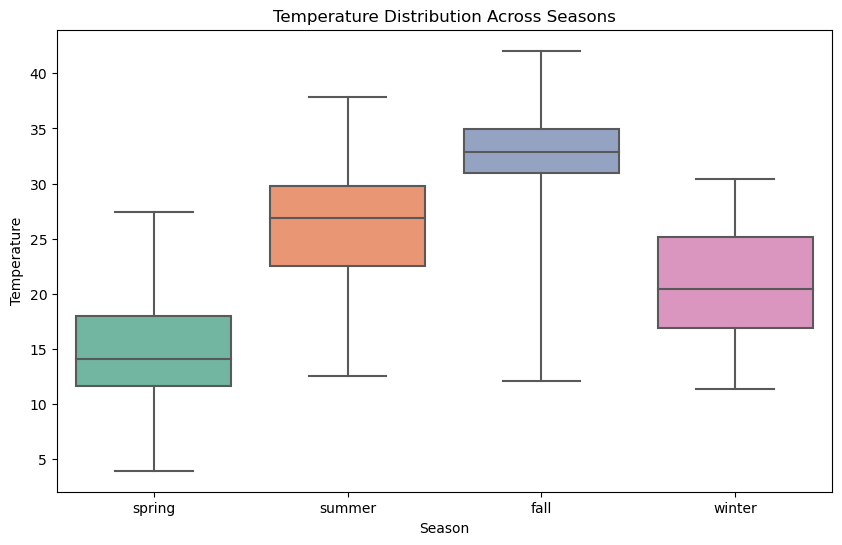

In [15]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='atemp', data=bike, palette='Set2',whis=5)
plt.title('Temperature Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.show()

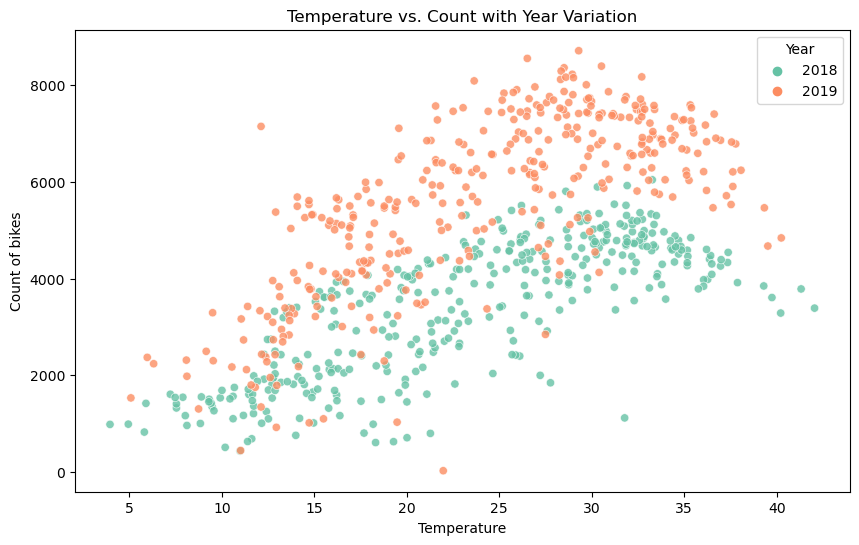

In [16]:
#Bivariate Analysis

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', hue='year', data=bike, palette='Set2', alpha=0.8)
plt.title('Temperature vs. Count with Year Variation')
plt.xlabel('Temperature')
plt.ylabel('Count of bikes')
plt.legend(title='Year')
plt.show()

As you can see, the count has increased after the post-COVID period, since people can now roam outside. Additionally, there is more demand for bikes when the temperature is higher, and people prefer using them during that time.

These were the EDA analysis now let's proceed to building the model

### Here we are splitting the data and viewing the specific coulmns.'THIS IS FOR ONLY VIEWING THR CORRELATION


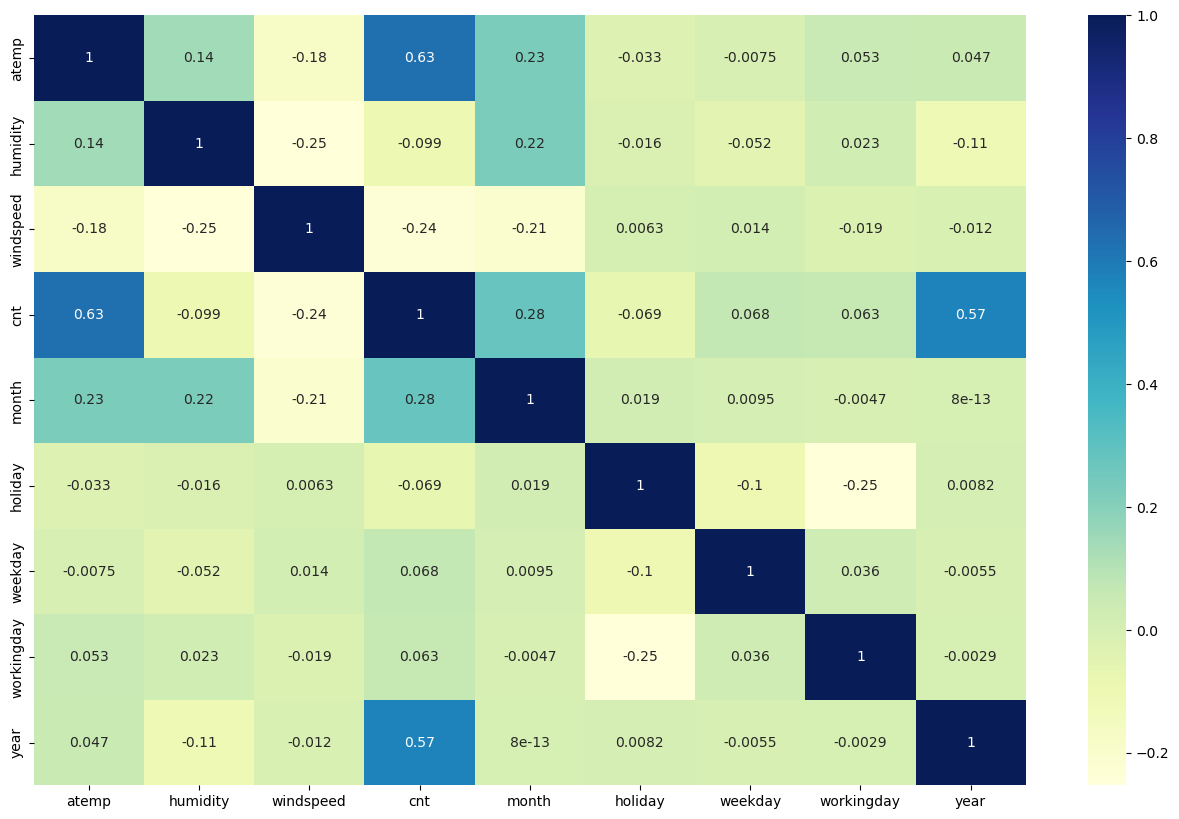

In [17]:
num_vars = ['atemp', 'humidity', 'windspeed','cnt','month','holiday','weekday','workingday','year']
plt.figure(figsize = (16, 10))
sns.heatmap(bike[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

As you can see from this heatmap that the TEMP,YEAR and MONTH has the highest correlation. This information is just to understand which variable has the most variance.

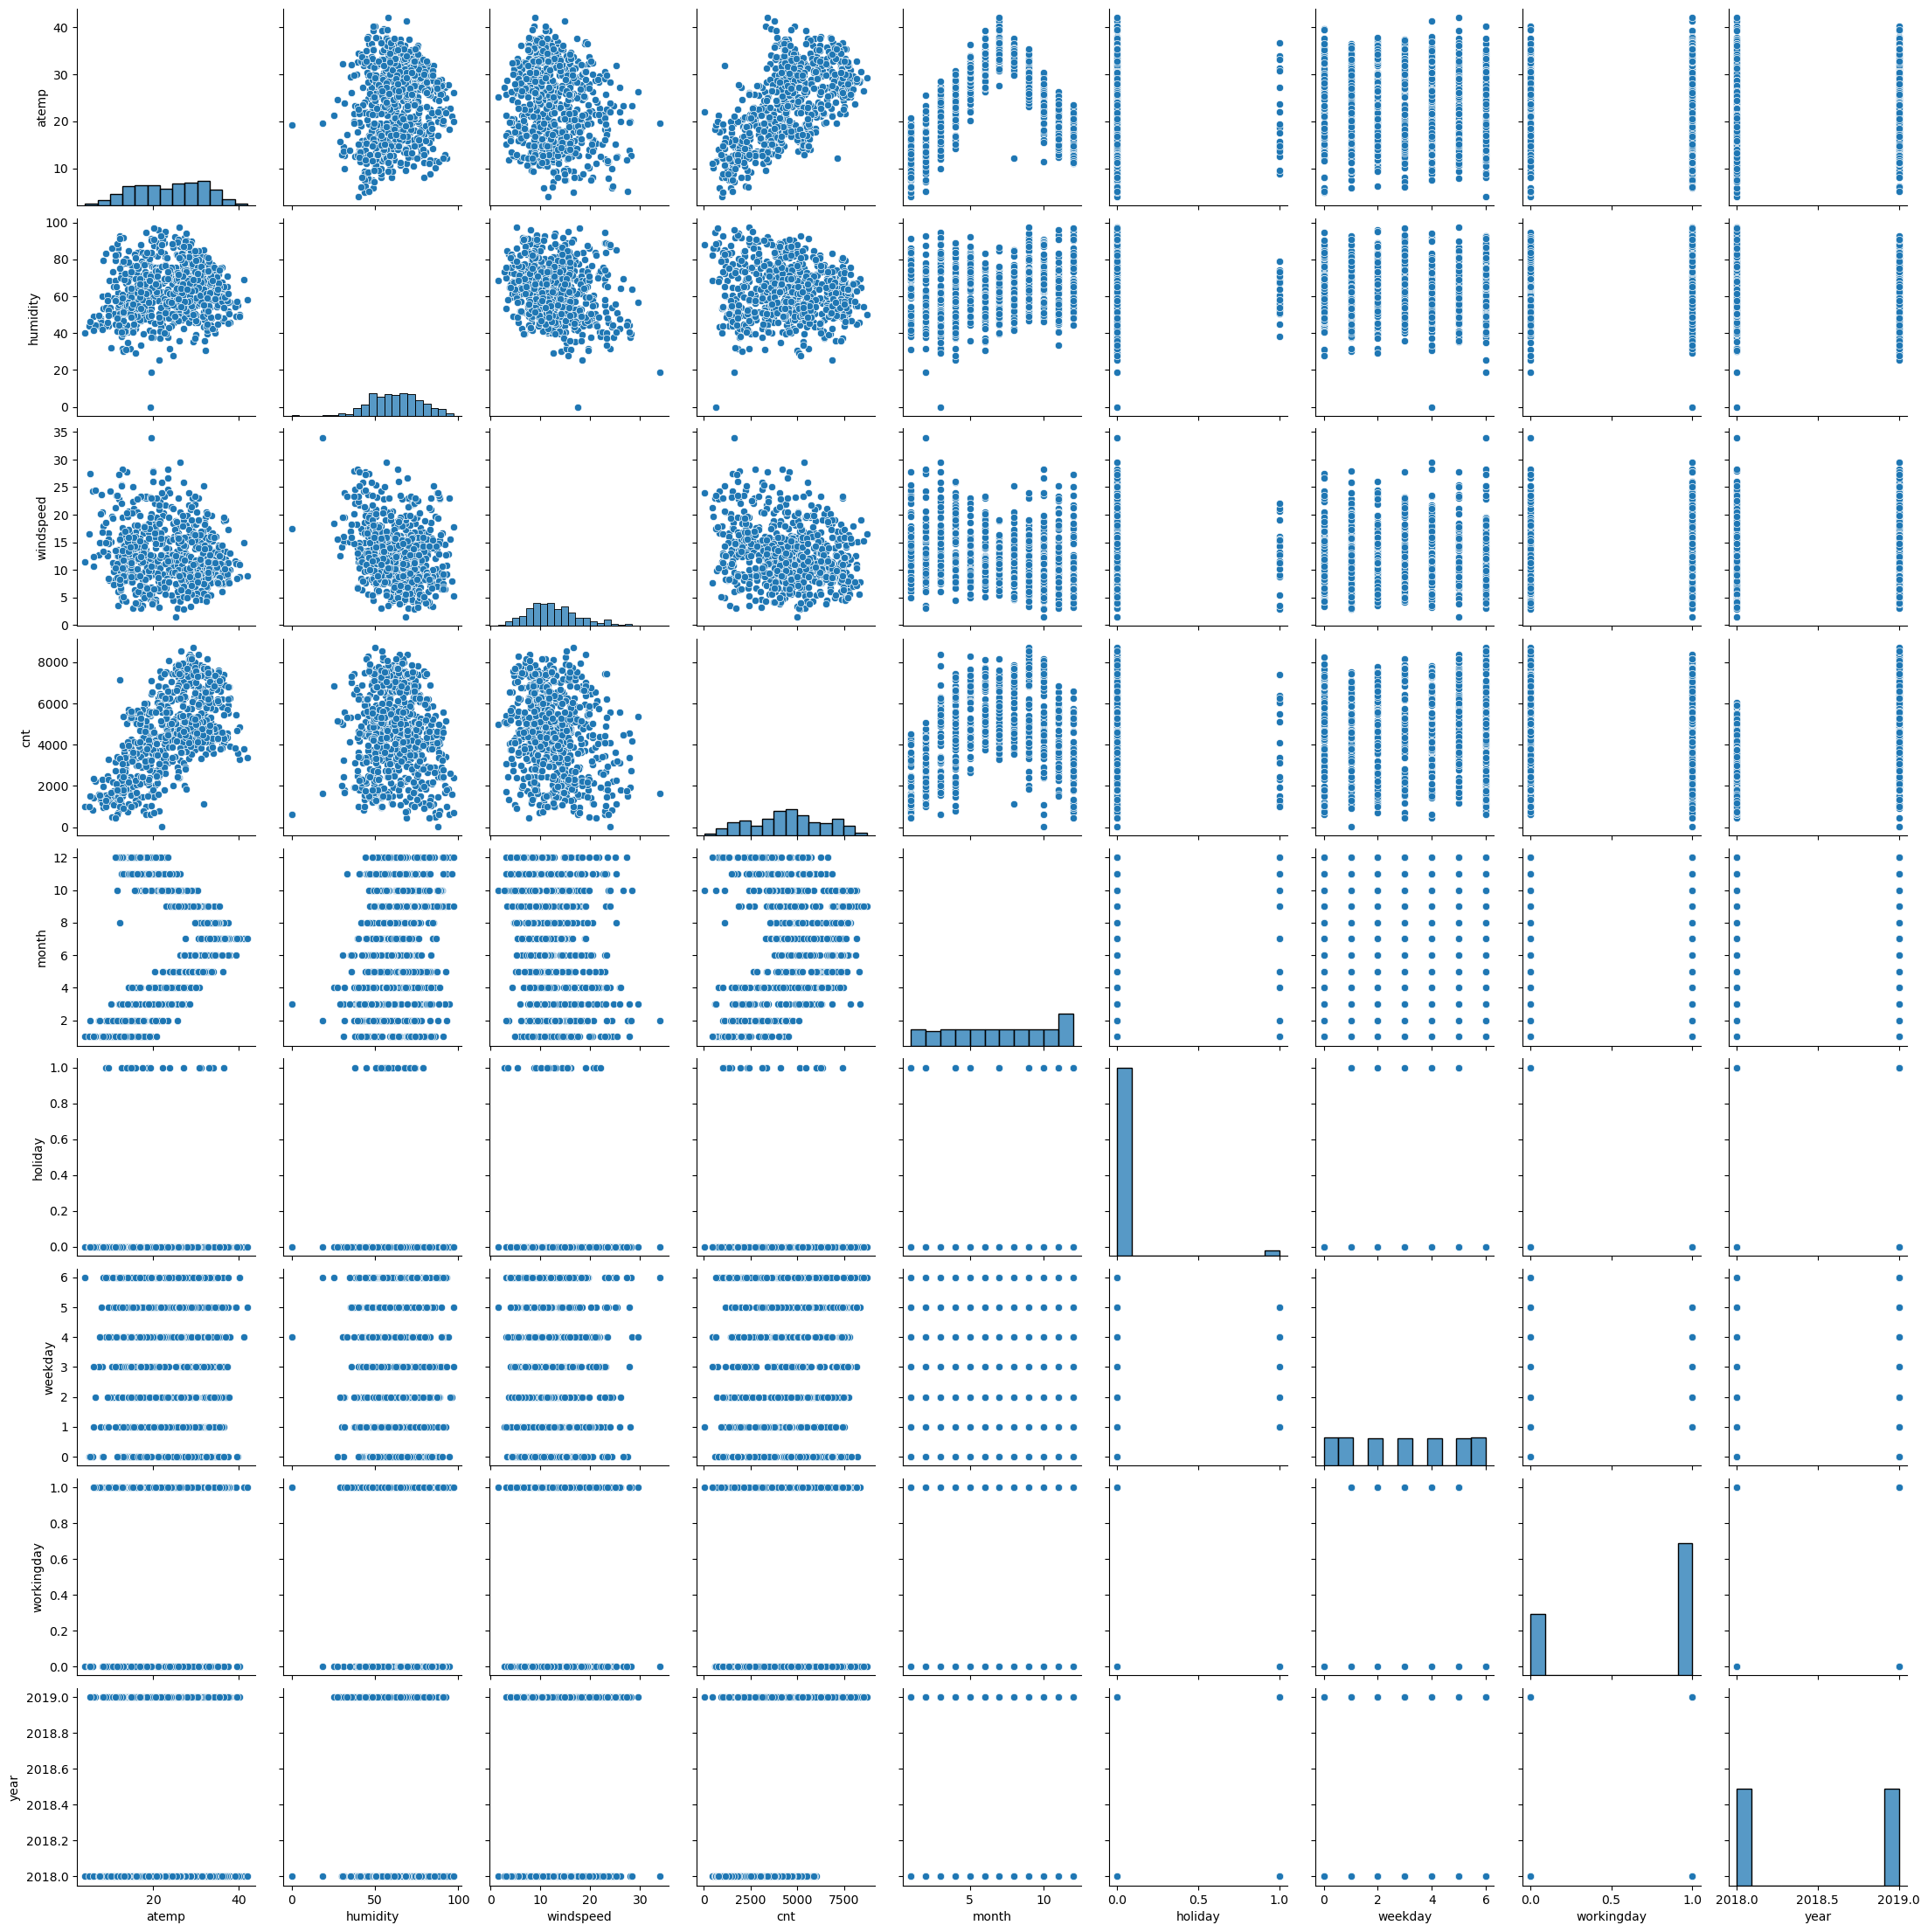

In [18]:
num_vars = ['atemp', 'humidity', 'windspeed','cnt','month','holiday','weekday','workingday','year']
# Create pair plot
sns.pairplot(bike[num_vars])

# Display the plot
plt.show()


#### Above we can see the pair plot and the relation between all these NUMERIC variables.

## Step3: Data Preparation



In [19]:
# Dropping the casual and registered column because we won't be using these for building the model and to avoid any Multicollinearity
bike.drop(columns=['casual'], inplace=True)
bike.drop(columns=['registered'], inplace=True)
bike.drop(columns=['dteday'], inplace=True)

In [20]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather,atemp,humidity,windspeed,cnt
0,spring,2018,1,0,6,0,mist,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,mist,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import statsmodels.api as sm

# Separate continuous and categorical variables
continuous_cols = ['atemp', 'humidity', 'windspeed', 'cnt']
categorical_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(bike[categorical_cols])

#### Here I am using the One-hot encoding for the categorial variables and min-max scaling for the continoues variables

In [22]:
# Assign encoded values back to DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
bike_encoded = pd.concat([bike[continuous_cols], encoded_df], axis=1)

### Rescaling the Features 
As rescalling the features is extremely important to rescale the variables so that they have a comparable scale.

In [23]:
# Min-Max Scaling for the continuous variables
scaler = MinMaxScaler()
bike_encoded[continuous_cols] = scaler.fit_transform(bike_encoded[continuous_cols])

# Combine continuous and encoded categorical variables
X = bike_encoded.drop('cnt', axis=1)  # Assuming 'target_variable' is the target variable column
y = bike_encoded['cnt']

## Step 4: Building a linear model
##### Dividing into X and Y sets for the model building

In [24]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Calculate p-values
X_train_with_const = sm.add_constant(X_train)  # Add a constant column for the intercept term
ols_model = sm.OLS(y_train, X_train_with_const).fit()
p_values = ols_model.pvalues

# Filter out variables with p-values greater than the threshold
p_value_threshold = 0.05
significant_variables_p_value = p_values[p_values < p_value_threshold].index
print(significant_variables_p_value)

Index(['const', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'year_2019', 'month_3', 'month_9', 'weekday_6',
       'workingday_1', 'weather_light-snow', 'weather_mist'],
      dtype='object')


These are the variables which we will use in the model building since there P Value is less than 0.05

In [26]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X_train_with_const[significant_variables_p_value]
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

# Filter out variables with VIF greater than the threshold
vif_threshold = 10
significant_variables_vif = vif_series[vif_series < vif_threshold].index
print(significant_variables_vif)

Index(['atemp', 'humidity', 'windspeed', 'season_spring', 'season_winter',
       'year_2019', 'month_3', 'month_9', 'weekday_6', 'workingday_1',
       'weather_light-snow', 'weather_mist'],
      dtype='object')


These are the variables which we will use in the model building since there VIF Value is less than 5 except for the 'atemp' since it has high correlation with the target variable we will be using it in the model.

In [27]:
# Combine significant variables based on both p-value and VIF
significant_variables = significant_variables_p_value.intersection(significant_variables_vif)

# Train the model with filtered variables
model.fit(X_train[significant_variables], y_train)

# Evaluate the model
train_score = model.score(X_train[significant_variables], y_train)
test_score = model.score(X_test[significant_variables], y_test)



In [28]:
print("Training R^2 score: {:.2f}%".format(train_score * 100))
print("Testing R^2 score: {:.2f}%".format(test_score * 100))


Training R^2 score: 82.73%
Testing R^2 score: 85.01%


Here after the final step we can see that the R square value is in the given range '80-85%' for both the TEST and TRAIN models

## Step 7: Residual Analysis

So, now to check if the error terms are also normally distributed, we will plot the histogram of the error terms and see what it looks like.

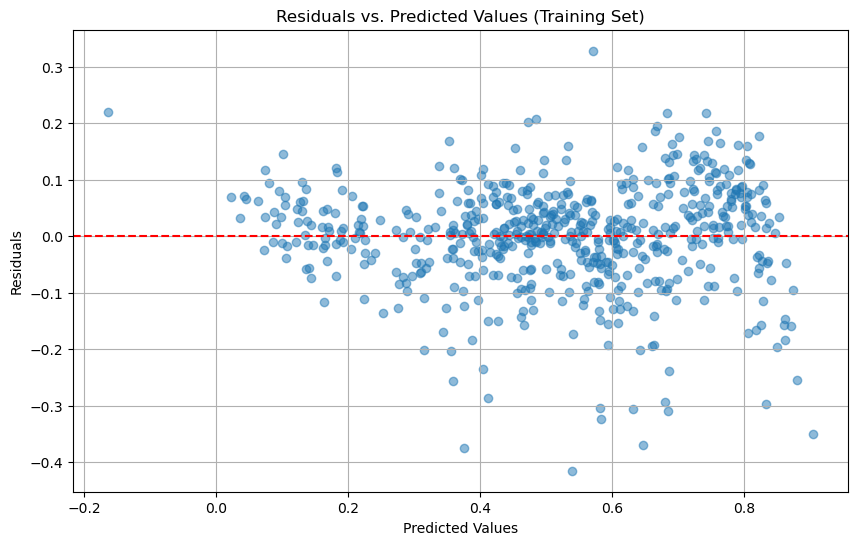

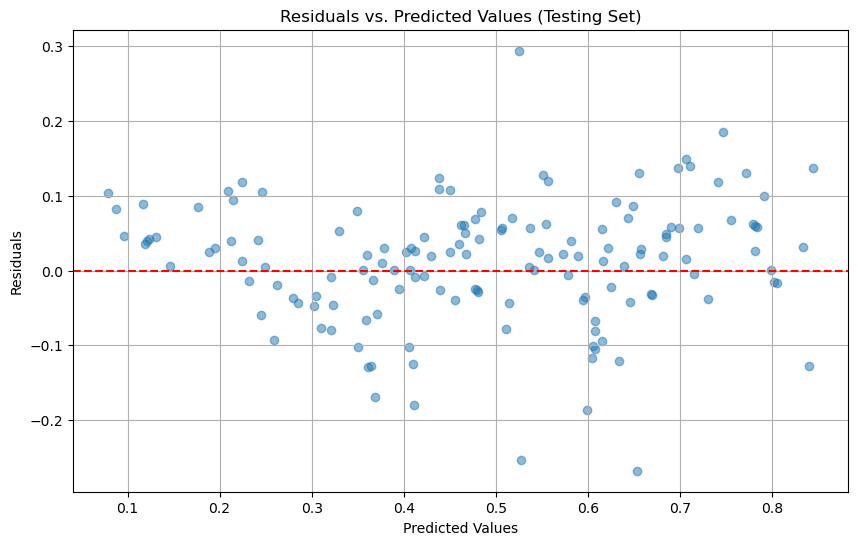

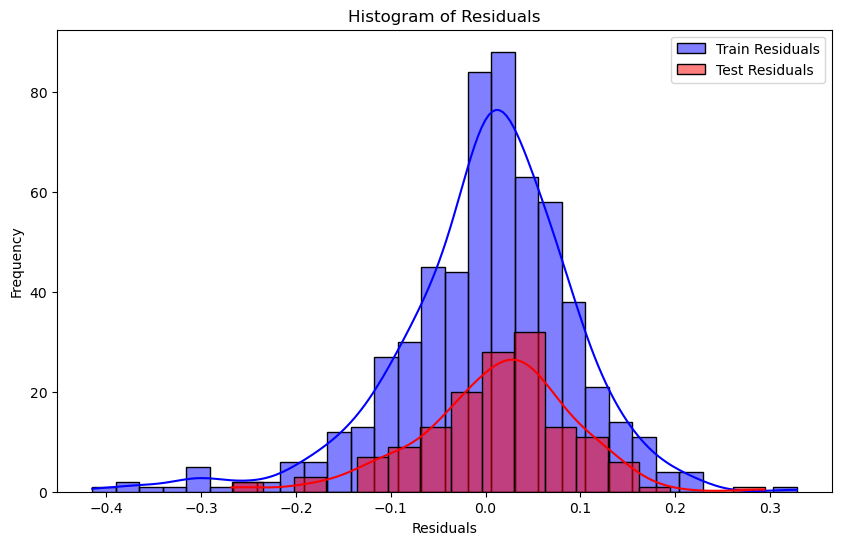

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'X_train[significant_variables]' and 'y_train' are our training features and target
# 'X_test[significant_variables]' and 'y_test' are our testing features and target

# Make predictions on the training and testing set
y_train_pred = model.predict(X_train[significant_variables])
y_test_pred = model.predict(X_test[significant_variables])

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Training Set)")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Plot residuals vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Testing Set)")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.5)
sns.histplot(test_residuals, kde=True, color='red', label='Test Residuals', alpha=0.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()


As we can see that the residuals are near the line at 0 and exhibit a random scatter with constant spread, it suggests that the linear regression model is performing well and meets the assumptions of homoscedasticity and linearity.